First import widgets as bellow
Installation of the widgets was already done in docker image:
`RUN ~/miniconda3/bin/conda install -c conda-forge ipywidgets -y`

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

Then install and import fastai stuff. It is needed for the plot_function

In [2]:
!pip install -Uqq fastai
!pip install -Uqq fastbook

In [3]:
from fastbook import plot_function,np,torch,plt
from functools import partial
# import numpy as np
# import pytorch as torch

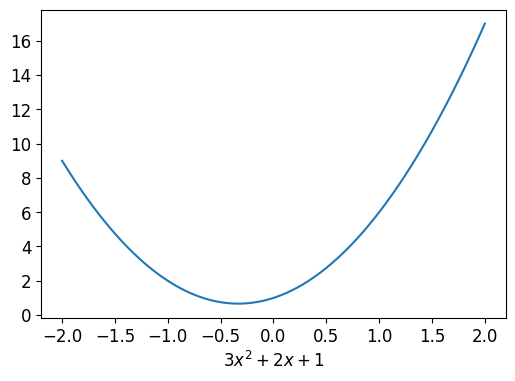

In [4]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [5]:
def quad(a, b, c, x): return a*x**2 + b*x + c

In [6]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

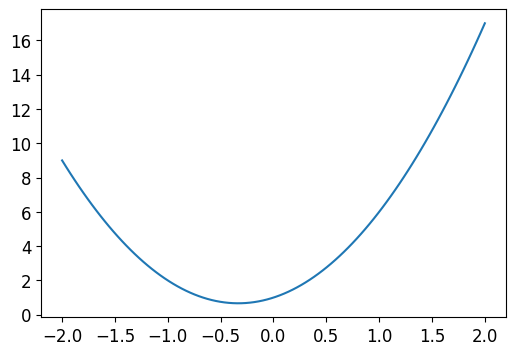

In [7]:
f2 = mk_quad(3,2,1)
plot_function(f2)

In [8]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [9]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

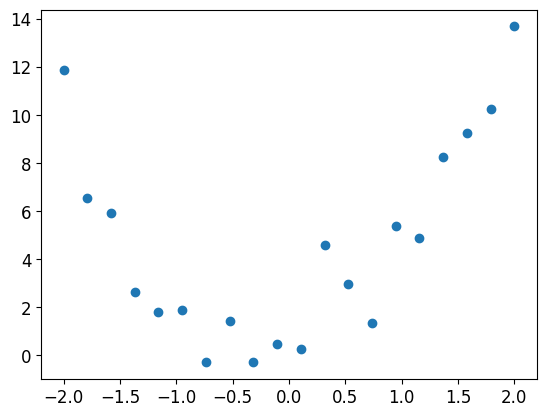

In [10]:
plt.scatter(x,y);

In [11]:
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [12]:
x[:5],y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

In [31]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()
# f(x), x, torch.abs(f(x)-x)
# torch.abs(f(x)-x).mean()
# torch.abs(f(x)-x)

In [16]:
# ! %matplotlib notebook
# ! %matplotlib widget
    
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")
    
# plot_quad(1.1,1.1,1.1)
# widgets.interact(

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [25]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [26]:
quad_mae([1.1, 1.1, 1.1])

tensor(2.4219, dtype=torch.float64)

In [59]:
abc = torch.tensor([1.1,1.1,1.1])

In [60]:
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [61]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [62]:
loss.backward()

In [63]:
abc.grad

tensor([-1.3529, -0.0316, -0.5000])

In [45]:
with torch.no_grad():
    abc -= abc.grad * 0.01
    loss = quad_mae(abc)

print(f"loss={loss:.2f}")

loss=3.70


In [67]:
for i in range(9):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=1.47
step=1; loss=1.36
step=2; loss=1.23
step=3; loss=1.17
step=4; loss=1.16
step=5; loss=1.25
step=6; loss=1.40
step=7; loss=1.56
step=8; loss=1.71


In [68]:
abc

tensor([3.0699, 1.2998, 1.6980], requires_grad=True)

## Theory
We are trying to identify quadratic function f(x) = ax^2+bx+c tat would have the lowest mean squared error when compared to (x,y) pairs of dotts. 
We do this by setting arbitrary values for a,b anc c to be euqal 1.1. 
#### Error calculation
We calculate the error by subsctrcting f(x) - y for every x and y we have.
#### Error function
We can look at error as a function with 3 variables: a,b and c. The solution to get the lowest error would be to get the minimum of error function. The minimum of function is the point in which the differencial of the function is smallest.

## Practice with Python
We create tensor or vektor named abc like this: `abc=torch.tensor([1.1,1.1,1.1])`. Then we call `abc.requires_grad_()` to mark it for calculatiing gradient whenever we use theese numbers in a calculation. Now we calculate the error with current value of `abc` and gradients are calculated. Gradients are here the slope for each a,b and c in error function. For example if we would present error function as `err(a,b,c) = ga*a + gb*b+gc*c` the gradients for a,b and c would be ga, gb and gc. The error minimum would be around some space where ga, gb and gc are close to 0.


In [69]:
def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y, 0.)

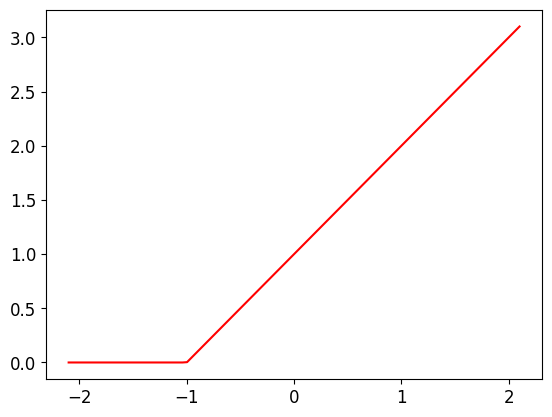

In [70]:
plot_function(partial(rectified_linear, 1,1))

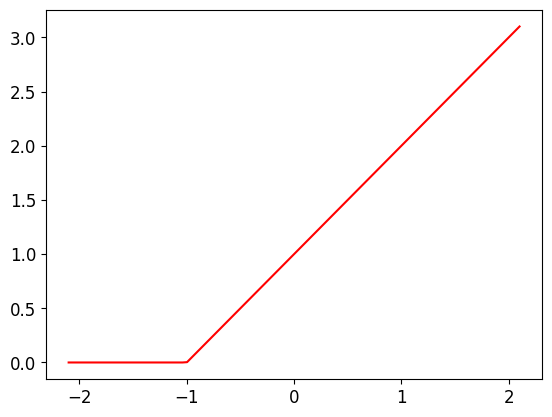

In [71]:
import torch.nn.functional as F
def rectified_linear2(m,b,x): return F.relu(m*x+b)
plot_function(partial(rectified_linear2, 1,1))

In [72]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectified_linear, m,b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

In [73]:
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)

@interact(m1=-1.5, b1=-1.5, m2=1.5, b2=1.5)
def plot_double_relu(m1, b1, m2, b2):
    plot_function(partial(double_relu, m1,b1,m2,b2), ylim=(-1,6))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…